# HTN 2018 Machine Learning Clientelle 

The story: A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import *

In [68]:
df0 = pd.read_csv("C:/Users/nydea/Desktop/Churn_Modelling.csv")

In [69]:
df0

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [70]:
df0.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
df1 = df0.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

df1 = df1.dropna()

df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
df1['Male'] = np.where(df1["Gender"]=="Male", 1, 0)

df2=df1.drop(['Gender'],axis = 1)
df2.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


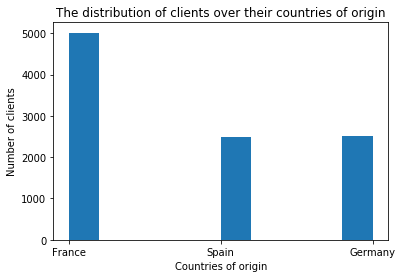

In [73]:
geography = df2["Geography"]

plt.hist([geography])
plt.xlabel('Countries of origin')
plt.ylabel('Number of clients')
plt.title("The distribution of clients over their countries of origin")
plt.show()

The possible countries of origin are France, Spain, and Germany. Knowing that, we can designate the countries into floats.

France = 0
Spain = 1
Germany = 2

In [74]:
#df2["France"] = np.where(df2["Geography"]=="France", 1, 0)
#df2["Spain"] = np.where(df2["Geography"]=="Spain", 1, 0)
#df2["Germany"] = np.where(df2['Geography']=='Germany', 1 , 0)
#df2.drop(["Geography"], axis = 1)

df2.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


In [75]:
df3 = pd.concat([df2, pd.get_dummies(df2["Geography"])], axis=1)

df3 = df3.drop(["Geography"], axis = 1)
df3

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,1,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,1,1,0,0


In [76]:
from sklearn.model_selection import train_test_split
df = df3
y = df['Exited']
X = df.drop(['Exited'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 88)


# Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lr_clf = LinearRegression()

lr_clf.fit(X_train, y_train)

preds = lr_clf.predict(X_test)

preds = np.rint(preds)

In [78]:
print(classification_report(y_test, preds))
accuracy_score(y_test, preds)

             precision    recall  f1-score   support

          0       0.81      0.98      0.89      1594
          1       0.57      0.13      0.21       406

avg / total       0.76      0.80      0.75      2000



0.803

# Random Forests

In [79]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt', n_estimators=40, oob_score=True,random_state=88)
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)

In [80]:
print(classification_report(y_test, preds))
accuracy_score(y_test,preds)

             precision    recall  f1-score   support

          0       0.87      0.96      0.91      1594
          1       0.73      0.44      0.55       406

avg / total       0.84      0.85      0.84      2000



0.853

In [81]:
importances = rfc.feature_importances_

for i in range(len(X_train.columns)):
    print(X_train.columns[i], '\t', importances[i])
    

CreditScore 	 0.14330554830079728
Age 	 0.23548509448047353
Tenure 	 0.0818559513439598
Balance 	 0.13983173592917497
NumOfProducts 	 0.13668545501723267
HasCrCard 	 0.01784932267190154
IsActiveMember 	 0.04027744202997722
EstimatedSalary 	 0.1415775024424767
Male 	 0.01936087422583095
France 	 0.010806483360683053
Germany 	 0.024119292331624225
Spain 	 0.008845297865868042


The most important features in descending order are Age, Credit Score, Balance, and Number of Products. 

This can be used to show that older clients with a high credit score, large balance, high salary, and multiple products are more likely to exit the firm.
Parameters such as Tenure, credit card, active member, gender, and location do not effect much, although Germans are the most likely to exit.

In [82]:
dfT = df.drop(["Tenure", 'HasCrCard', "IsActiveMember", "Male", "France", 'Germany', 'Spain'], axis =1)
dfT.head()

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,0.00,1,101348.88,1
1,608,41,83807.86,1,112542.58,0
2,502,42,159660.80,3,113931.57,1
3,699,39,0.00,2,93826.63,0
4,850,43,125510.82,1,79084.10,0


In [83]:
y = dfT['Exited']
X = dfT.drop(['Exited'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 88)


In [84]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt', n_estimators=40, oob_score=True,random_state=88)
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)

In [85]:
print(classification_report(y_test, preds))
accuracy_score(y_test,preds)

             precision    recall  f1-score   support

          0       0.86      0.93      0.89      1594
          1       0.60      0.39      0.47       406

avg / total       0.80      0.82      0.81      2000



0.8235

A slight drop in accuracy is observed when decreasing the number of variables, so it is best to stick with more parameters. This can be further tuned to find optimal hyperparameters.

In [86]:
y = df['Exited']
X = df.drop(['Exited'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 88)

In [87]:
from sklearn.grid_search import GridSearchCV

rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt', n_estimators=40,oob_score=True,random_state=42)

param_grid = {
    'n_estimators': [20, 25,30,40],
    'max_features': ['auto','sqrt','log2']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5)

CV_rfc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 25, 30, 40], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [88]:
print(CV_rfc.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)


In [89]:
accuracy_score(CV_rfc.predict(X_test),y_test)

0.8555

In [90]:
rfc = CV_rfc.best_estimator_

In [91]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Male', 'France',
       'Germany', 'Spain'],
      dtype='object')

# Applying to clients

In [92]:
creditScore=input("Credit Score of Client: ")
age = input("Age of Client: ")
tenure = input("Tenure of Client: ")
balance = input("Balance of Client's bank: ")
numofprod = input("Number of prodcuts owned by client: ")
hascrcard = input("Does client own credit card? (y/n): ")
isactmem = input("Is client an active member? (y/n): ")
estsal = input("Client's estimated salary: ")
gender = input("Gender of client (Male/Female): ")
country = input("Client's origin country (France, Germany, Spain): ")
france = 0
germany = 0
spain = 0

In [93]:
if hascrcard == "y":
    hascrcard = 1
elif hascrcard == "n":
    hascrcard = 0
if isactmem =="y":
    isactmem = 1
elif hascrcard =="n":
    isactmem = 0
if gender == "Male" or gender == "male":
    gender = 1
elif gender == "Female" or gender == "female":
    gender = 0
if country == "France" or country == "france":
    france = 1
elif country == "Germany" or country == "germany":
    germany = 1
elif country == "Spain" or country == "spain":
    spain = 1


In [94]:
client = {'CreditScore': creditScore, 'Age':age, 'Tenure':tenure, 'Balance':balance, 'NumOfProducts':numofprod, 'HasCrCard':hascrcard,
       'IsActiveMember':isactmem, 'EstimatedSalary':estsal, 'Male':gender, 'France':france,
       'Germany':germany, 'Spain':spain}

client = list(client.values())

In [96]:
if rfc.predict([client])[0]==0:
    print("This client has high potential of exiting the bank.")
else:
    print("This client has low potential of exiting the bank.")

This client has high potential of exiting the bank.
